# Exercise 2 : Classification system with KNN - Student dataset

Names of the students :
- Dan Yvan Baumgartner
- Jan Huber

## Loading of the training set and test set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load and format training set
df = pd.read_csv('ex1-data-train.csv', header=None)
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
label = df.iloc[:,2]
df = pd.DataFrame({'x1':x1,'x2':x2,'label':label})

# Load and format data test set
data_test = pd.read_csv('ex1-data-test.csv', header=None)
x1 = data_test.iloc[:,0]
x2 = data_test.iloc[:,1]
label = data_test.iloc[:,2]
data_test = pd.DataFrame({'x1':x1,'x2':x2,'label':label})

## Plot of the training set

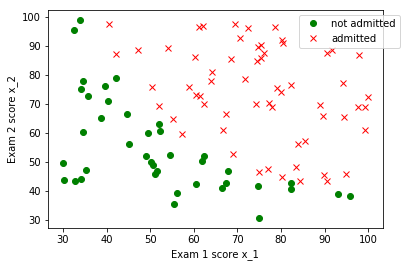

In [3]:
plt.plot(df.loc[df['label']==0,'x1'],df.loc[df['label']==0,'x2'],'og',label='not admitted')
plt.plot(df.loc[df['label']==1,'x1'],df.loc[df['label']==1,'x2'],'xr',label='admitted')
plt.xlabel("Exam 1 score x_1")
plt.ylabel("Exam 2 score x_2")
plt.legend(bbox_to_anchor=(0.75, 0.98), loc=2, borderaxespad=0.)
plt.show()

## Implementation of the classifiers
The dummy_predict classifier is choosing randomly the class.

The knn_predict classifier is taking the dominant class among the k nearest neighbors.

In [4]:
def dummy_predict(val):
    return random.randint(0,1)

def knn_predict(data_set,val,k):
    knn_index = np.sqrt(np.sum(np.square(data_set-val), axis=1)).sort_values()[:k].index.values
    predict_val = np.mean(data_set.iloc[knn_index]['label'])
    return int(np.round(predict_val))

## Performance of the dummy classifier
The overall performance of the dummy classifier varies around 50% accuracy.

In [5]:
N_correct = 0
N = len(data_test)
for i,row in data_test.iterrows():
    if dummy_predict(row) == row['label']:
        N_correct += 1

print('Accuracy of the dummy classifier : ', N_correct / N)

Accuracy of the dummy classifier :  0.54


## Performance of the K-nn classifier
The overall performance of the K-nn classifier (for K=1) is about 96% for this specific test set. Therefore, this algorithm is performing very well on this task.

In [6]:
N_correct = 0
k=1
for i,row in data_test.iterrows():
    val = knn_predict(df,row,k)
    if  val == row['label']:
        N_correct += 1
precision = N_correct / data_test.shape[0]
print('Accuracy of the K-nn classifier (k=1) : ', precision)

Accuracy of the K-nn classifier (k=1) :  0.97


## Performance of the K-nn classifier according to the hyperparameter K
This test shows the performance of the K-nn classifier for k=1...7

In [8]:
N = data_test.shape[0]
k_max=7

performance=pd.DataFrame({"k":np.zeros(k_max),"perf":np.zeros(k_max)})
for k in range(1,k_max+1):
    N_correct = 0
    for i,row in data_test.iterrows():
        val = knn_predict(df,row,k)
        if  val == row['label']:
            N_correct += 1
    precision = N_correct / N
    performance['perf'][k-1] = precision
    performance['k'][k-1] = k

The following graph shows that the accuracy of the classifier is decreasing as K increase. The result of this test may vary according to the data set and the test set. The best K values are either 1 or 3.

The rounding mechanism for the determination of the class also has a significant impact on the performance. In this implementation, the K-nn returns 0 when there is an equal number of votes for the classes.

It is also noticable that the odd numbers for K decreases the accuracy, presumably because the tie situation can only occur for odd values of K.

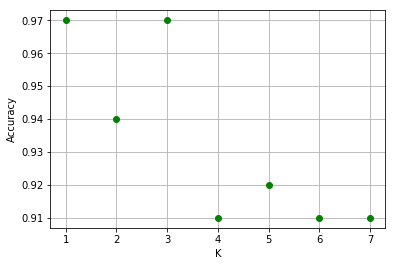

k  perf
0  1.0  0.97
1  2.0  0.94
2  3.0  0.97
3  4.0  0.91
4  5.0  0.92
5  6.0  0.91
6  7.0  0.91

In [9]:
plt.plot(performance['k'],performance['perf'],'og')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
performance